<div id="container" style="position:relative;">
<div style="float:left"><h1> NLP with Hotel Review Part 1</h1>
</div>
<div style="position:relative; float:right">

### Sri Casper

### Dataset

Hotel_Reviews dataset will be used in this report. The dataset contains information about customer reviews about the hotels they stayed from many countries around the world. The dataset contains the data from 2015 to 2017.

#### Data Dictionary

- Hotel_Address                               --  object 
- Additional_Number_of_Scoring                --  int64  
- Review_Date                                 --  object 
- Average_Score                               --  float64
- Hotel_Name                                  --  object 
- Reviewer_Nationality                        --  object 
- Negative_Review                             --  object 
- Review_Total_Negative_Word_Counts           --  int64  
- Total_Number_of_Reviews                     --  int64  
- Positive_Review                             --  object 
- Review_Total_Positive_Word_Counts           --  int64  
- Total_Number_of_Reviews_Reviewer_Has_Given  --  int64  
- Reviewer_Score                              --  float64
- Tags                                        --  object 
- days_since_review                           --  object 
- lat                                         --  float64
- lng                                         --  float64

### Exploratory Data Analysis

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Get the data from a .csv file
# Assign the file to 'mosquito_data'

hr_data = pd.read_csv('Hotel_Reviews.csv')

In [3]:
# Shape of the dataframe

hr_data.shape

(515738, 17)

In [4]:
# Print out rows and columns of the dataframe

print(f"We have {hr_data.shape[0]} rows and {hr_data.shape[1]} columns in the dataframe.")

We have 515738 rows and 17 columns in the dataframe.


In [5]:
# See a quick summary of each column, the datatypes,
# and the number of non-null values 

hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

- There are columns recorded in integers, floats, and objects.
- Moreover, Lat and Lon are the only columns with missing values, having 512,470 values out of 515,738 total rows of data.

In [6]:
# Check the data (head)

hr_data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [7]:
# Check the data (tail)

hr_data.tail()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677
515737,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/9/2015,8.1,Atlantis Hotel Vienna,Hungary,I was in 3rd floor It didn t work Free Wife,13,2823,staff was very kind,6,1,8.3,"[' Leisure trip ', ' Family with young childre...",725 day,48.203745,16.335677


In [8]:
# View 5 sample sets of the data

hr_data.sample(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
498362,Vijzelstraat 4 Amsterdam City Center 1017 HK A...,589,6/16/2016,7.0,NH Carlton Amsterdam,Brazil,No Negative,0,4231,Good space and neighboorhood,5,14,8.8,"[' Leisure trip ', ' Couple ', ' Standard Doub...",413 day,52.366373,4.893051
86138,2 8 Great Suffolk Street Southwark London SE1 ...,570,7/12/2016,9.3,Hilton London Bankside,United Kingdom,No Negative,0,2319,Great hotel with a good location Staff where ...,25,1,9.6,"[' Leisure trip ', ' Couple ', ' King Guest Ro...",387 day,51.505696,-0.101525
469505,Valencia 157 Eixample 08011 Barcelona Spain,230,9/26/2016,8.2,Sunotel Club Central,South Korea,The mini bar is not free,8,2836,The rooms are quite lovely They re very clean...,13,2,8.3,"[' Leisure trip ', ' Solo traveler ', ' Basic ...",311 day,41.387930,2.156806
46447,130 Tottenham Court Road Camden London W1T 5AY...,713,1/2/2017,8.3,Radisson Blu Edwardian Grafton,United Kingdom,No Negative,0,2826,Friendly staff very welcoming Beautiful room ...,14,1,10.0,"[' Leisure trip ', ' Couple ', ' Standard Doub...",213 day,51.524139,-0.138081
298142,Caspe 103 Eixample 08013 Barcelona Spain,312,1/20/2016,8.5,Ayre Hotel Caspe,United States of America,Changed rooms at first My key never worked wh...,24,3442,Clean easy,3,10,7.1,"[' Leisure trip ', ' Couple ', ' Double or Twi...",561 day,41.396102,2.179469


In [9]:
# Filter out only the columns with 'int' datatype

hr_data.select_dtypes('int64').head()

,Additional_Number_of_Scoring,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given
0,194,397,1403,11,7
1,194,0,1403,105,7
2,194,42,1403,21,9
3,194,210,1403,26,1
4,194,140,1403,8,3


In [10]:
# Filter out only the columns with float datatype

hr_data.select_dtypes('float64').head()

,Average_Score,Reviewer_Score,lat,lng
0,7.7,2.9,52.360576,4.915968
1,7.7,7.5,52.360576,4.915968
2,7.7,7.1,52.360576,4.915968
3,7.7,3.8,52.360576,4.915968
4,7.7,6.7,52.360576,4.915968


In [11]:
# Filter out only the columns with object datatype

hr_data.select_dtypes('object').head()

,Hotel_Address,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags,days_since_review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/3/2017,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/3/2017,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,"[' Leisure trip ', ' Family with young childre...",3 days
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/24/2017,Hotel Arena,New Zealand,You When I booked with your company on line y...,Amazing location and building Romantic setting,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days


#### Convert 'Reviewer_Score' into integers from 1 to 10

In [12]:
# Review the column 'Reviewer_Score'

hr_data['Reviewer_Score']

0         2.9
1         7.5
2         7.1
3         3.8
4         6.7
         ... 
515733    7.0
515734    5.8
515735    2.5
515736    8.8
515737    8.3
Name: Reviewer_Score, Length: 515738, dtype: float64

In [13]:
# Round the values in 'Reviewer_Score'

hr_data['Reviewer_Score'] = hr_data['Reviewer_Score'].round()

In [14]:
# Check the values in the column

hr_data['Reviewer_Score']

0         3.0
1         8.0
2         7.0
3         4.0
4         7.0
         ... 
515733    7.0
515734    6.0
515735    2.0
515736    9.0
515737    8.0
Name: Reviewer_Score, Length: 515738, dtype: float64

In [15]:
# Convert 'Reviewer_Score' column datatype to 'int'

hr_data['Reviewer_Score'] = hr_data['Reviewer_Score'].astype('int64')

In [16]:
# Check the datatype of the column

hr_data['Reviewer_Score'].dtypes

dtype('int64')

In [17]:
# Review the values in 'Reviewer_Score'

hr_data['Reviewer_Score']

0         3
1         8
2         7
3         4
4         7
         ..
515733    7
515734    6
515735    2
515736    9
515737    8
Name: Reviewer_Score, Length: 515738, dtype: int64

#### Distribution of 'Reviewer_Score'

In [18]:
# Check the distribution

hr_data['Reviewer_Score'].value_counts()

10    187744
8     110155
9     105722
7      44088
6      27800
5      24188
4       9436
3       4406
2       2199
Name: Reviewer_Score, dtype: int64

In [19]:
# Check the distribution

hr_data['Reviewer_Score'].value_counts(normalize = True)

10    0.364030
8     0.213587
9     0.204992
7     0.085485
6     0.053903
5     0.046900
4     0.018296
3     0.008543
2     0.004264
Name: Reviewer_Score, dtype: float64

- Approximately 36.4% of the records show 10 as the majority of reviewer scores.

In [20]:
# Print out the total number of unique values in 'Reviewer_Score'

print(f"There are {hr_data['Reviewer_Score'].nunique()} unique scores in the 'Reviewer_Score' column (from 2 to 10).")

There are 9 unique scores in the 'Reviewer_Score' column (from 2 to 10).


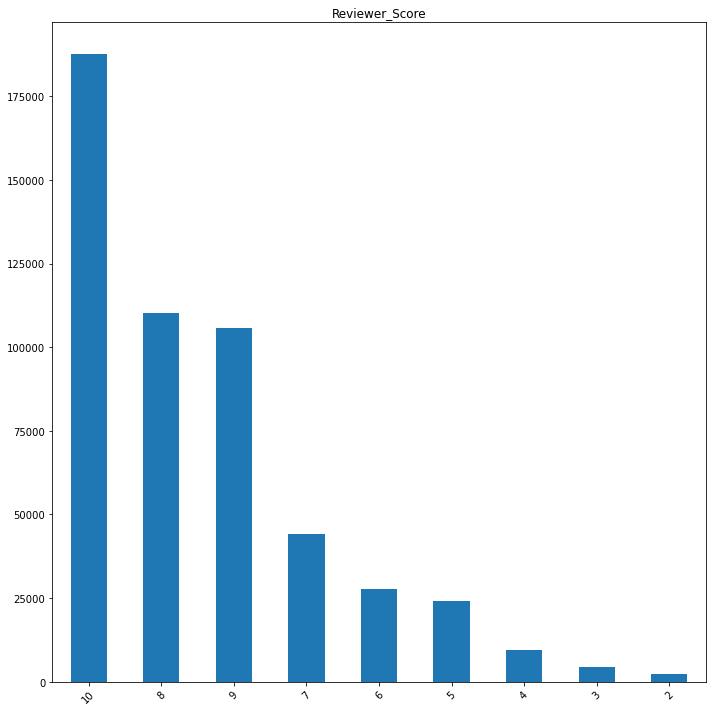

In [21]:
# Plot bar charts for 'Reviewer_Score'

columns = ['Reviewer_Score']

plt.subplots(figsize = (10, 10))

counter = 0

for col in columns:
    counter +=1
    plt.subplot(1, 1, counter)
    hr_data[col].value_counts().plot.bar(rot = 45)
    plt.title(columns[counter - 1])
    
plt.tight_layout();

- The frequency is decreasing respectively from 10, 8, 9, and then 7 to 2.
- Moreover, the amount of values in 10, 8, and 9 are drastically higher than the others.

In [22]:
print(f"The mean of 'Reviewer_Score' is {hr_data['Reviewer_Score'].mean()}.")
print(f"The median of 'Reviewer_Score' is {hr_data['Reviewer_Score'].median()}.")

The mean of 'Reviewer_Score' is 8.45757729699964.
The median of 'Reviewer_Score' is 9.0.


The values in 'Reviewer_Score' are discrete (2-10) and evenly separated. Given this will be a classification problem, a potential problem that might occur with this distribution is that it could be a sentiment analysis, where the task is to classify a given review as positive, negative, or neutral. However, the machine is not able to identify which score would be considered as positive, negative, or neutral. Sentiment analysis involves using natural language processing techniques to extract relevant features. Thus, we might need to labeled dataset of Reviewer_Score with their corresponding sentiment labels, and used them to train a model. Once the model is trained, it can be used to classify new reviews as positive, negative, or neutral.

#### Numeric columns

In [23]:
# Assign numeric and non-numeric columns

numeric = hr_data.select_dtypes(exclude = 'object').columns  # all data types expect 'object'

categorical = hr_data.select_dtypes('object').columns

In [24]:
list(numeric)

['Additional_Number_of_Scoring',
 'Average_Score',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Reviewer_Score',
 'lat',
 'lng']

In [25]:
print(f"Here's the list of all numeric columns: {list(numeric)}.")

Here's the list of all numeric columns: ['Additional_Number_of_Scoring', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'lat', 'lng'].


In [26]:
# Summarize numerical data

hr_data[numeric].describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.457577,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.683671,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.000000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,8.000000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,9.000000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,10.000000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


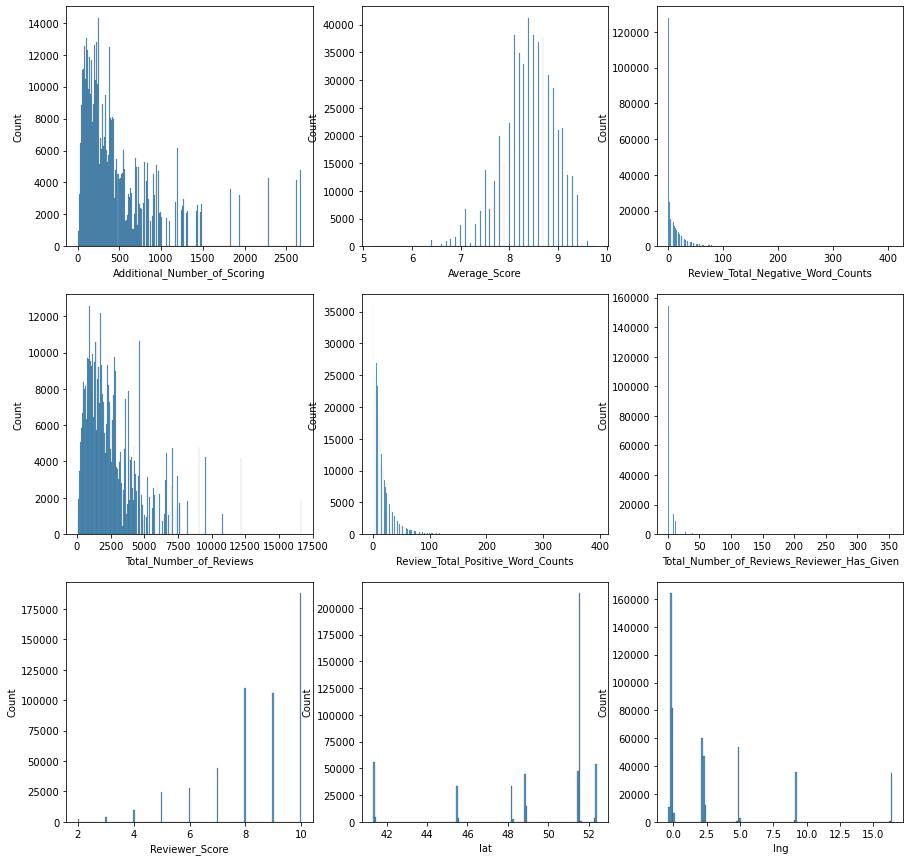

In [27]:
# Plot distribution of all the numerical columns

plt.subplots(3, 3, figsize = (15, 15))

counter = 1

for col in list(numeric):
    plt.subplot(3, 3, counter)
    sns.histplot(hr_data[col])
    
    counter+=1

- Seems like 'Average_Score' is the only column with normal distribution while the rest are either left-skewed or right-skewed.

#### Non-numeric columns

In [28]:
list(categorical)

['Hotel_Address',
 'Review_Date',
 'Hotel_Name',
 'Reviewer_Nationality',
 'Negative_Review',
 'Positive_Review',
 'Tags',
 'days_since_review']

In [29]:
print(f"Here's the list of all non-numeric columns: {list(categorical)}.")

Here's the list of all non-numeric columns: ['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Positive_Review', 'Tags', 'days_since_review'].


In [30]:
# Summarize non-numeric data

hr_data[categorical].describe()

,Hotel_Address,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags,days_since_review
count,515738,515738,515738,515738,515738,515738,515738,515738
unique,1493,731,1492,227,330011,412601,55242,731
top,163 Marsh Wall Docklands Tower Hamlets London ...,8/2/2017,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,No Positive,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days
freq,4789,2585,4789,245246,127890,35946,5101,2585


In [31]:
# Review non-numeric data

hr_data[categorical].head()

,Hotel_Address,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags,days_since_review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/3/2017,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/3/2017,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,"[' Leisure trip ', ' Family with young childre...",3 days
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/24/2017,Hotel Arena,New Zealand,You When I booked with your company on line y...,Amazing location and building Romantic setting,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days


#### Turn some of the non-numeric columns to numeric

#### days_since_review

This column should be turned to numeric because the values represent the amount of days since review. Also, the data type should be converted to 'int64'.

In [32]:
# Check the data type

hr_data['days_since_review'].dtypes

dtype('O')

In [33]:
# View sample of the column

hr_data['days_since_review'].sample(5)

386457    391 day
332456    120 day
49490     487 day
440865    513 day
497498    619 day
Name: days_since_review, dtype: object

In [34]:
# Identify where to split

hr_data['days_since_review'].str.split(' ')

0          [0, days]
1          [0, days]
2          [3, days]
3          [3, days]
4         [10, days]
             ...    
515733    [704, day]
515734    [712, day]
515735    [715, day]
515736    [717, day]
515737    [725, day]
Name: days_since_review, Length: 515738, dtype: object

In [35]:
day_df = hr_data['days_since_review'].str.split(' ', expand = True)

day_df.head()

,0,1
0,0,days
1,0,days
2,3,days
3,3,days
4,10,days


In [36]:
# Rename the columns to 'Days_Since_Review' and 'day'

day_df = day_df.rename(columns = {0:'Days_Since_Review', 1:'day'})

In [37]:
# Check if the column names changed

day_df.head()

,Days_Since_Review,day
0,0,days
1,0,days
2,3,days
3,3,days
4,10,days


In [38]:
# Use these outputs to reinject 'Days_Since_Review' and 'day' columns into the dataframe

hr_data = pd.concat([hr_data, day_df], axis = 1)

In [39]:
# Drop 'days_since_review' and 'day' columns

hr_data = hr_data.drop(columns = ['days_since_review', 'day'])

- These two columns are dropped because they are not necessary. 'day' only contains the word 'day', and 'days_since_review' is already updated to 'Days_Since_Review'.

In [40]:
# Check if 'days_since_review' and 'day' columns are dropped

hr_data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,lat,lng,Days_Since_Review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,3,"[' Leisure trip ', ' Couple ', ' Duplex Double...",52.360576,4.915968,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,8,"[' Leisure trip ', ' Couple ', ' Duplex Double...",52.360576,4.915968,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,"[' Leisure trip ', ' Family with young childre...",52.360576,4.915968,3
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,4,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",52.360576,4.915968,3
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",52.360576,4.915968,10


In [41]:
# Check the data type of the new column 'Days_Since_Review'

hr_data['Days_Since_Review'].dtypes

dtype('O')

- The data type of 'Days_Since_Review' is object.

In [42]:
# Check if the column is numeric

from pandas.api.types import is_numeric_dtype

is_numeric_dtype(hr_data['Days_Since_Review'])

False

- 'Days_Since_Review' is not numeric.

In [43]:
# Convert 'Days_Since_Review' column to be numeric

hr_data['Days_Since_Review'] = pd.to_numeric(hr_data['Days_Since_Review'])

In [44]:
# Check if the column is numeric

is_numeric_dtype(hr_data['Days_Since_Review'])

True

- The 'Days_Since_Review' column is now numeric.

In [45]:
hr_data['Days_Since_Review'].dtypes

dtype('int64')

- The data type of the column is also 'int64'.

In [46]:
# Review the column

hr_data['Days_Since_Review']

0           0
1           0
2           3
3           3
4          10
         ... 
515733    704
515734    712
515735    715
515736    717
515737    725
Name: Days_Since_Review, Length: 515738, dtype: int64

#### Review_Date

'Review_Date' should be converted to 'datetime' because it helps identify and process time-related elements and can extract date formats from strings.

In [47]:
# View sample of the column

hr_data['Review_Date'].sample(5)

113534     12/5/2016
81378      1/23/2017
137567     10/7/2015
486526    10/16/2016
277840      2/5/2017
Name: Review_Date, dtype: object

In [48]:
# Check the data type

hr_data['Review_Date'].dtypes

dtype('O')

In [49]:
# Convert 'Review_Date' to 'datetime'

hr_data['Review_Date'] = pd.to_datetime(hr_data['Review_Date'])

In [50]:
# Check the data type

hr_data['Review_Date'].dtypes

dtype('<M8[ns]')

- The data type of 'Review_Date' is now 'datetime64'.

In [51]:
# Sanity check

hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Hotel_Address                               515738 non-null  object        
 1   Additional_Number_of_Scoring                515738 non-null  int64         
 2   Review_Date                                 515738 non-null  datetime64[ns]
 3   Average_Score                               515738 non-null  float64       
 4   Hotel_Name                                  515738 non-null  object        
 5   Reviewer_Nationality                        515738 non-null  object        
 6   Negative_Review                             515738 non-null  object        
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64         
 8   Total_Number_of_Reviews                     515738 non-null  int64        

In [52]:
# Check the amount of reviews for each date

hr_data['Review_Date'].value_counts()

2017-08-02    2585
2016-09-15    2308
2017-04-05    2284
2016-08-30    1963
2016-02-16    1940
              ... 
2016-09-10     199
2015-11-27     194
2017-04-03     192
2017-04-01     173
2017-04-02     143
Name: Review_Date, Length: 731, dtype: int64

In [53]:
# Assign and update numeric and non-numeric columns

numeric_col = hr_data.select_dtypes(exclude = 'object').columns  # all data types expect 'object'

categorical_col = hr_data.select_dtypes('object').columns

In [54]:
# View numeric list

list(numeric_col)

['Additional_Number_of_Scoring',
 'Review_Date',
 'Average_Score',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Reviewer_Score',
 'lat',
 'lng',
 'Days_Since_Review']

In [55]:
# View categorical list

list(categorical_col)

['Hotel_Address',
 'Hotel_Name',
 'Reviewer_Nationality',
 'Negative_Review',
 'Positive_Review',
 'Tags']

In [56]:
hr_data[numeric_col].describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng,Days_Since_Review
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000,515738.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.457577,49.442439,2.823803,354.441932
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.683671,3.466325,4.579425,208.928124
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.000000,41.328376,-0.369758,0.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,8.000000,48.214662,-0.143372,175.000000
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,9.000000,51.499981,0.010607,353.000000
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,10.000000,51.516288,4.834443,527.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233,730.000000


In [57]:
hr_data[categorical_col].describe()

,Hotel_Address,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags
count,515738,515738,515738,515738,515738,515738
unique,1493,1492,227,330011,412601,55242
top,163 Marsh Wall Docklands Tower Hamlets London ...,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,No Positive,"[' Leisure trip ', ' Couple ', ' Double Room '..."
freq,4789,4789,245246,127890,35946,5101


#### Duplicate

In [58]:
# Checking for any duplicate

hr_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
515733    False
515734    False
515735    False
515736    False
515737    False
Length: 515738, dtype: bool

In [59]:
# Sum the resultant array to get the total number of duplicate rows

hr_data.duplicated().sum()

526

- There are 526 duplicate rows.

In [60]:
# Check what % of the dataset is duplicated

((hr_data.duplicated().sum()) / hr_data.shape[0]) * 100

0.10198976999949588

- Approximately 0.1% of the dataset is duplicated which is very small.

In [61]:
# Get rid of the duplicated row,
# but first check what is in them 
# Check if there is any pattern being duplicated

hr_data.loc[hr_data.duplicated(), :].sort_values('Days_Since_Review')

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,lat,lng,Days_Since_Review
68983,167 rue de Rome 17th arr 75017 Paris France,11,2017-08-02,6.8,Villa Eugenie,United States of America,Place is old not worthy of 4 stars,9,165,Location friendly staff cell phone for use du...,12,21,7,"[' Leisure trip ', ' Solo traveler ', ' Standa...",48.887128,2.314205,1
180251,40 Rue du Commandant Ren Mouchotte 14th arr 75...,228,2017-08-01,7.9,H tel Concorde Montparnasse,Lebanon,Room sevice,3,2515,Location,2,16,10,"[' Leisure trip ', ' Family with young childre...",48.838108,2.318669,2
180113,40 Rue du Commandant Ren Mouchotte 14th arr 75...,228,2017-07-31,7.9,H tel Concorde Montparnasse,Netherlands,Hotel had no shower gel no soap no shampoo ba...,116,2515,The room was OK,5,1,6,"[' Leisure trip ', ' Group ', ' Classic Double...",48.838108,2.318669,3
180114,40 Rue du Commandant Ren Mouchotte 14th arr 75...,228,2017-07-29,7.9,H tel Concorde Montparnasse,Lebanon,The original agreement with the reservation w...,80,2515,Breakfast was good rooms ok,6,1,6,"[' Leisure trip ', ' Solo traveler ', ' 2 Adja...",48.838108,2.318669,5
61876,16 22 Great Russell Street Camden London WC1B ...,300,2017-07-27,9.0,The Bloomsbury Hotel,Israel,No Negative,0,1254,The attention received by Sebastian and his t...,12,4,10,"[' Leisure trip ', ' Couple ', ' Superior Doub...",51.517167,-0.129053,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260243,9 Rue Sainte Beuve 6th arr 75006 Paris France,22,2015-08-08,8.9,Hotel Le Sainte Beuve,Australia,No Negative,0,143,Friendly staff,3,2,10,"[' Leisure trip ', ' Couple ', ' Superior Room...",48.843900,2.329486,726
180249,40 Rue du Commandant Ren Mouchotte 14th arr 75...,228,2015-08-07,7.9,H tel Concorde Montparnasse,Australia,The cleaning staff have an appauling attitude...,28,2515,I liked the staff at the front desk very help...,14,3,5,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",48.838108,2.318669,727
180250,40 Rue du Commandant Ren Mouchotte 14th arr 75...,228,2015-08-06,7.9,H tel Concorde Montparnasse,Ireland,Paper cups and plastic spoons for tea Temp co...,22,2515,Bed wasnt too bad pillows comfy and duvet lig...,14,1,6,"[' Leisure trip ', ' Couple ', ' Superior Doub...",48.838108,2.318669,728
68997,167 rue de Rome 17th arr 75017 Paris France,11,2015-08-05,6.8,Villa Eugenie,Switzerland,nothing,2,165,the place was very clean and quite,8,1,8,"[' Leisure trip ', ' Family with older childre...",48.887128,2.314205,729


- There is a pattern among the duplicates.
- What most duplicates have in common are including 'Hotel_Address', 'Hotel_Name', and 'Total_Number_of_Reviews', 'Tags', 'lat', and 'lng'.

In [62]:
# Assign the dataframe to 'hotel_reviews'

hotel_reviews = hr_data.drop_duplicates()

In [63]:
# Shape of the clean dataframe

hotel_reviews.shape

(515212, 17)

In [64]:
# Print out rows and columns of the new dataframe

print(f"We have {hotel_reviews.shape[0]} rows and {hotel_reviews.shape[1]} columns in the new dataframe.")

We have 515212 rows and 17 columns in the new dataframe.


In [65]:
# Checking if there is any duplicate in columns

hotel_reviews.T.duplicated()

Hotel_Address                                 False
Additional_Number_of_Scoring                  False
Review_Date                                   False
Average_Score                                 False
Hotel_Name                                    False
Reviewer_Nationality                          False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Tags                                          False
lat                                           False
lng                                           False
Days_Since_Review                             False
dtype: bool

- Thereis no duplicate.

#### Missing value

In [66]:
# Check if there is any missing value

hotel_reviews.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
lat                                           3268
lng                                           3268
Days_Since_Review                                0
dtype: int64

- There are some missing values in 'lat' and 'lng'.

In [67]:
# Calculate the proportion of missing values

(hotel_reviews.isna().sum() / hotel_reviews.shape[0]) * 100

Hotel_Address                                 0.000000
Additional_Number_of_Scoring                  0.000000
Review_Date                                   0.000000
Average_Score                                 0.000000
Hotel_Name                                    0.000000
Reviewer_Nationality                          0.000000
Negative_Review                               0.000000
Review_Total_Negative_Word_Counts             0.000000
Total_Number_of_Reviews                       0.000000
Positive_Review                               0.000000
Review_Total_Positive_Word_Counts             0.000000
Total_Number_of_Reviews_Reviewer_Has_Given    0.000000
Reviewer_Score                                0.000000
Tags                                          0.000000
lat                                           0.634302
lng                                           0.634302
Days_Since_Review                             0.000000
dtype: float64

- There are only 0.63% missing values in 'lat' and 'lng'.

#### Clean 'lat' column

In [68]:
# Get the statistics for 'lat'

hotel_reviews['lat'].describe()

count    511944.000000
mean         49.443040
std           3.468029
min          41.328376
25%          48.214277
50%          51.499981
75%          51.516288
max          52.400181
Name: lat, dtype: float64

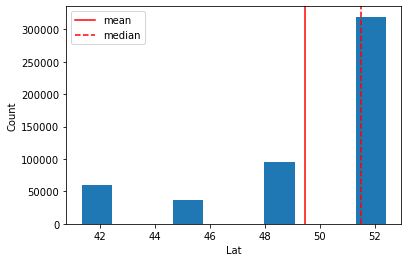

In [69]:
# Plot a histogram for 'lat'

plt.figure()

plt.hist(hotel_reviews['lat'])
plt.xlabel('Lat')
plt.ylabel('Count')
plt.axvline(hotel_reviews['lat'].mean(), label = 'mean', c = 'r')
plt.axvline(hotel_reviews['lat'].median(), label = 'median', c = 'r', linestyle = '--')

plt.legend()
plt.show()

In [70]:
# Get mode of 'lat'

lat_mode = hotel_reviews['lat'].mode()[0]

lat_mode

51.5019097

In [71]:
# Fill the missing values with mode

hotel_reviews.loc[:, 'lat'] = hotel_reviews.loc[:,'lat'].fillna(lat_mode)

/var/folders/3r/xt5d5yjn5vj2x8xpx00xsy4c0000gn/T/ipykernel_25423/2510616494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_reviews.loc[:, 'lat'] = hotel_reviews.loc[:,'lat'].fillna(lat_mode)


In [72]:
# Sanity check

hotel_reviews['lat'].isna().sum()

0

- There is no missing value in 'lat'.

#### Clean 'lng' column

In [73]:
# Get the statistics for 'lng'

hotel_reviews['lng'].describe()

count    511944.000000
mean          2.824222
std           4.581637
min          -0.369758
25%          -0.143649
50%          -0.000250
75%           4.834443
max          16.429233
Name: lng, dtype: float64

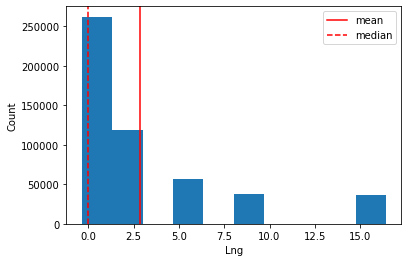

In [74]:
# Plot a histogram for 'lng'

plt.figure()

plt.hist(hotel_reviews['lng'])
plt.xlabel('Lng')
plt.ylabel('Count')
plt.axvline(hotel_reviews['lng'].mean(), label = 'mean', c = 'r')
plt.axvline(hotel_reviews['lng'].median(), label = 'median', c = 'r', linestyle = '--')

plt.legend()
plt.show()

In [75]:
# Get mode of 'lng'

lng_mode = hotel_reviews['lng'].mode()[0]

lng_mode

-0.0232208

In [76]:
# Fill the missing values with mode

hotel_reviews.loc[:, 'lng'] = hotel_reviews.loc[:,'lng'].fillna(lng_mode)

/var/folders/3r/xt5d5yjn5vj2x8xpx00xsy4c0000gn/T/ipykernel_25423/1968365243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_reviews.loc[:, 'lng'] = hotel_reviews.loc[:,'lng'].fillna(lng_mode)


In [77]:
# Sanity check

hotel_reviews['lng'].isna().sum()

0

- There is no missing value in 'lng'.

In [78]:
# Check if there is still any missing value

hotel_reviews.isna().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
lat                                           0
lng                                           0
Days_Since_Review                             0
dtype: int64

- There is no missing value.

### Data Wrangling

#### Convert the 'Reviewer_Score' column into a binary column in the following way

- Reviews that are below 9 should be encoded as 0 ('not good')
- Reviews with scores 9 and 10 as 1 ('good')

In [79]:
# View the column

hotel_reviews['Reviewer_Score'].sample(10)

23774     10
279367     8
31854      8
138167     9
194115    10
471223     9
245723    10
481376     9
485359     2
373036    10
Name: Reviewer_Score, dtype: int64

In [80]:
# Check all distinct values

hotel_reviews['Reviewer_Score'].value_counts()

10    187592
8     110035
9     105621
7      44041
6      27765
5      24152
4       9421
3       4393
2       2192
Name: Reviewer_Score, dtype: int64

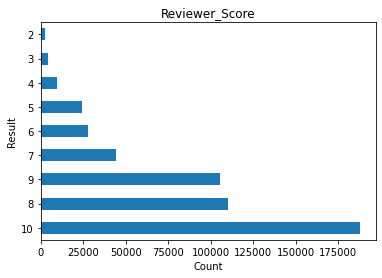

In [81]:
# View all distinct values on a bar chart

hotel_reviews['Reviewer_Score'].value_counts().plot(kind='barh')

plt.title('Reviewer_Score')
plt.xlabel('Count')
plt.ylabel('Result')

plt.show()

- Reviewer Score at 2, 3, 4, and 5 are less than 25,000.

In [82]:
# Checking the distribution

hotel_reviews['Reviewer_Score'].value_counts(normalize = True)

10    0.364106
8     0.213572
9     0.205005
7     0.085481
6     0.053890
5     0.046878
4     0.018286
3     0.008527
2     0.004255
Name: Reviewer_Score, dtype: float64

- Approximately 36.4% of the records show 10 as the majority of reviewer scores.

In [83]:
# Use the np.where to convert

hotel_reviews['Reviewer_Score'] = np.where(hotel_reviews['Reviewer_Score'] < 9, 0, 1)

/var/folders/3r/xt5d5yjn5vj2x8xpx00xsy4c0000gn/T/ipykernel_25423/1580041614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_reviews['Reviewer_Score'] = np.where(hotel_reviews['Reviewer_Score'] < 9, 0, 1)


- 'Reviewer_Score' column is converted to a binary column, where reviews that are <b>below 9 represent 0 ('not good')</b>, and reviews with scores <b>9 and 10 represent 1 ('good')</b>.

In [84]:
# Check if the column is converted

hotel_reviews['Reviewer_Score'].value_counts()

1    293213
0    221999
Name: Reviewer_Score, dtype: int64

- <b>'Reviewer_Score'</b> column is now converted to a <b>binary</b> column.

#### Convert the columns 'Reviewer_Score' into numeric columns, and drop all non-numeric columns except Positive_Review and Negative_Review

In [85]:
# Check the data type of 'Days_Sine_Review' column

hotel_reviews['Reviewer_Score'].dtypes

dtype('int64')

In [86]:
# Check if the column is numeric

is_numeric_dtype(hotel_reviews['Reviewer_Score'])

True

- 'Reviewer_Score' is already a numeric column.

In [87]:
# View the column

hotel_reviews['Reviewer_Score']

0         0
1         0
2         0
3         0
4         0
         ..
515733    0
515734    0
515735    0
515736    1
515737    0
Name: Reviewer_Score, Length: 515212, dtype: int64

- This shows that 'Days_Since_Review' is a numeric column.

In [88]:
hotel_reviews['Reviewer_Score'].value_counts()

1    293213
0    221999
Name: Reviewer_Score, dtype: int64

In [89]:
# Checking the distribution

hotel_reviews['Reviewer_Score'].value_counts(normalize = True)

1    0.569111
0    0.430889
Name: Reviewer_Score, dtype: float64

- Now approximately <b>57% represents 'good'</b> while 43% represents 'not good' reviewer score.

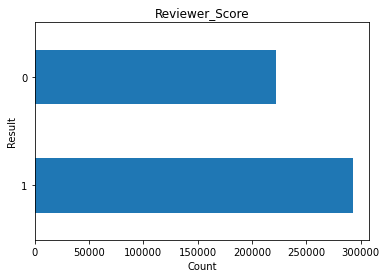

In [90]:
# View all distinct values on a bar chart

hotel_reviews['Reviewer_Score'].value_counts().plot(kind='barh')

plt.title('Reviewer_Score')
plt.xlabel('Count')
plt.ylabel('Result')

plt.show()

- According to the plot, 1 or 'good' is the majority of 'Reviewer_Score'.

#### Drop all non-numeric columns except 'Positive_Review' and 'Negative_Review'

In [91]:
# View non-numeric columns

list(categorical_col)

['Hotel_Address',
 'Hotel_Name',
 'Reviewer_Nationality',
 'Negative_Review',
 'Positive_Review',
 'Tags']

In [92]:
hotel_reviews[categorical_col].describe()

,Hotel_Address,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags
count,515212,515212,515212,515212,515212,515212
unique,1493,1492,227,330011,412601,55242
top,163 Marsh Wall Docklands Tower Hamlets London ...,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,No Positive,"[' Leisure trip ', ' Couple ', ' Double Room '..."
freq,4789,4789,245110,127757,35904,5101


In [93]:
hotel_reviews[categorical_col].head()

,Hotel_Address,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,"[' Leisure trip ', ' Family with young childre..."
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,New Zealand,You When I booked with your company on line y...,Amazing location and building Romantic setting,"[' Leisure trip ', ' Couple ', ' Suite ', ' St..."


In [94]:
# Drop all non-numeric columns except 'Positive_Review' and 'Negative_Review'

hotel_reviews = hotel_reviews.drop(columns = ['Hotel_Address',
                                              'Hotel_Name',
                                              'Reviewer_Nationality',
                                              'Tags'])

In [95]:
# Sanity check

hotel_reviews.head()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng,Days_Since_Review
0,194,2017-08-03,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,52.360576,4.915968,0
1,194,2017-08-03,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,52.360576,4.915968,0
2,194,2017-07-31,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,52.360576,4.915968,3
3,194,2017-07-31,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,52.360576,4.915968,3
4,194,2017-07-24,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,52.360576,4.915968,10


In [96]:
hotel_reviews.shape

(515212, 13)

- After dropping all non-numeric columns except 'Positive_Review' and 'Negative_Review', now there are 13 columns in total in the new dataframe.

In [97]:
# basic EDA summary

print(f"Total rows: {hotel_reviews.shape[0]}")
print(f"Total columns: {hotel_reviews.shape[1]}")
print(f"Null values: {hotel_reviews.isna().sum().sum()}")

Total rows: 515212
Total columns: 13
Null values: 0


#### Split the data into train and test sets

In [98]:
# Split the data into train and test sets
X = hotel_reviews[['Positive_Review','Negative_Review']]
y = hotel_reviews['Reviewer_Score']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.1, 
                                                    stratify = y, 
                                                    random_state = 1)

- test_size = 0.1: represents 10% of the data
- stratify = y: to ensure the same proportion is represented in both the train and test subsets
- random_state = 1: ensures to get reproducible results

In [99]:
X_train.shape

(463690, 2)

### Use a count vectorizer to combine 'Positive_Review' and 'Negative_Review' with the numeric data

In [100]:
# You should vectorize each column separately,
# ending up with two sparse matrixes,
# and then combine the three matrixes 
# (numeric data, positive matrix, negative matrix). 
# You may have to adjust the min_df parameter.

from sklearn.feature_extraction.text import CountVectorizer

#### Vectorize 'Positive_Review'

In [101]:
# 'Positive_Review'

# 1. Instantiate 
pos_vec = CountVectorizer(stop_words = 'english', min_df = 5)

# 2. Fit 
pos_vec.fit(hotel_reviews['Positive_Review'])

# 3. Transform
pos_transformed = pos_vec.transform(hotel_reviews['Positive_Review'])
pos_transformed

<515212x13041 sparse matrix of type '<class 'numpy.int64'>'
	with 4380727 stored elements in Compressed Sparse Row format>

In [102]:
# These are now the features, they are the individual tokens

pos_vec.get_feature_names_out()

array(['00', '000', '00am', ..., 'zuid', 'zum', 'zurich'], dtype=object)

In [103]:
# Convert the sparse matrix into a numpy array

pos_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### Vectorize 'Negative_Review'

In [104]:
# 'Negative_Review'

# 1. Instantiate 
neg_vec = CountVectorizer(stop_words = 'english', min_df = 5)

# 2. Fit 
neg_vec.fit(hotel_reviews['Negative_Review'])

# 3. Transform
neg_transformed = neg_vec.transform(hotel_reviews['Negative_Review'])
neg_transformed

<515212x15157 sparse matrix of type '<class 'numpy.int64'>'
	with 3818868 stored elements in Compressed Sparse Row format>

In [105]:
# These are now the features, they are the individual tokens

neg_vec.get_feature_names_out()

array(['00', '000', '001', ..., 'zoo', 'zoom', 'zuid'], dtype=object)

In [106]:
# Convert the sparse matrix into a numpy array

neg_transformed.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [170]:
# Assign 'numeric_data'

numeric_data = hotel_reviews[numeric_col]

In [171]:
# Review 'numeric_data' to check the data type of all columns

numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515212 entries, 0 to 515737
Data columns (total 11 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Additional_Number_of_Scoring                515212 non-null  int64         
 1   Review_Date                                 515212 non-null  datetime64[ns]
 2   Average_Score                               515212 non-null  float64       
 3   Review_Total_Negative_Word_Counts           515212 non-null  int64         
 4   Total_Number_of_Reviews                     515212 non-null  int64         
 5   Review_Total_Positive_Word_Counts           515212 non-null  int64         
 6   Total_Number_of_Reviews_Reviewer_Has_Given  515212 non-null  int64         
 7   Reviewer_Score                              515212 non-null  int64         
 8   lat                                         515212 non-null  float64      

- Notice that the data type of <b>'Review_Date'</b> is 'datetime64' which could cause an issue when combining the required matrixes (numeric_data, Positive_Review, Negative_Review). Thus, it needs to be removed.

In [174]:
# Drop 'Review_Date'

numeric_data = numeric_data.drop(columns = ['Review_Date'], axis = 1)

In [175]:
# Sanity Check

numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515212 entries, 0 to 515737
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515212 non-null  int64  
 1   Average_Score                               515212 non-null  float64
 2   Review_Total_Negative_Word_Counts           515212 non-null  int64  
 3   Total_Number_of_Reviews                     515212 non-null  int64  
 4   Review_Total_Positive_Word_Counts           515212 non-null  int64  
 5   Total_Number_of_Reviews_Reviewer_Has_Given  515212 non-null  int64  
 6   Reviewer_Score                              515212 non-null  int64  
 7   lat                                         515212 non-null  float64
 8   lng                                         515212 non-null  float64
 9   Days_Since_Review                           515212 non-null  int64  
d

- 'Review_Date' is dropped. The data type of the rest of the columns are either 'int64' or 'float64'.

In [176]:
# Convert the dataframe to a matrix

import scipy.sparse

numeric_data_matrix = scipy.sparse.csr_matrix(numeric_data.values)

numeric_data_matrix

<515212x10 sparse matrix of type '<class 'numpy.float64'>'
	with 4765605 stored elements in Compressed Sparse Row format>

#### Check the shape of each matrix to assure they have the same number of dimensions

In [163]:
# Check the shape of 'pos_transformed'

pos_transformed.shape

(515212, 13041)

In [158]:
# Check the shape of 'neg_transformed'

neg_transformed.shape

(515212, 15157)

In [177]:
# Check the shape of 'numeric_data_matrix'

numeric_data_matrix.shape

(515212, 10)

- The three matrixes have the same dimensions.

#### Combine the three matrices (numeric_data_matrix, pos_transformed, neg_transformed) using hstack

In [178]:
# Combine the three matrices

from scipy.sparse import hstack

combined_matrix = hstack((numeric_data_matrix, pos_transformed, neg_transformed))

combined_matrix

<515212x28208 sparse matrix of type '<class 'numpy.float64'>'
	with 12965200 stored elements in Compressed Sparse Row format>

- 'combined_matrix' has 515,212 rows and 28,208 columns.
- The columns are the combination of the columns of each matrix (the values above: 13041 + 15157 + 10 = 28208) 

#### What does the min_df parameter do?

- It removes terms that appear too infrequently. It can be a float between zero and one or an integer. If it is a float, the term must appear in at least x% of the documents to be included - for example, min_df of .01 would only include terms that appear in at least 1% of documents. If it is an integer, it is the lowest amount of times the term must appear. For example, min_df = 5 will only include terms appearing in at least 5 documents.
